<a href="https://colab.research.google.com/github/Jiravatmos/Readme/blob/main/K_means_Bank_Marketing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Bank Marketing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Bank Marketing Data
# https://archive.ics.uci.edu/dataset/222/bank+marketing
# 45211 sample with 16 Feature

# The data is related with direct marketing campaigns of a Portuguese banking institution.
#The marketing campaigns were based on phone calls. Often,
 #more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

url = 'https://docs.google.com/spreadsheets/d/1kkL7OwBll76DHX3krHUZprBbD7q3TDn2xgRwl7vVl38/edit?usp=sharing'
url = url.replace('/edit?usp=sharing', '/export?format=csv')
print('URL:', url)

df = pd.read_csv(url)
df.head()


URL: https://docs.google.com/spreadsheets/d/1kkL7OwBll76DHX3krHUZprBbD7q3TDn2xgRwl7vVl38/export?format=csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# X = fetaure , y=Target
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (45211, 16) object
y: (45211,) object


#Transform Caterical Data to numberical

In [ ]:
category = df.select_dtypes(include=["object"])
category.head()


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
for column in category:
  df[column] = labelencoder.fit_transform(df[column])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


## Cluster it!

In [ ]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()
X.shape, y.shape

((45211, 16), (45211,))

In [ ]:
from sklearn.cluster import KMeans
# again we know that it has 16 classes
model = KMeans(n_clusters=16)
model.fit(X)
y_pred = model.predict(X)
print(y_pred.shape)





(45211,)


### Assesing the clustering quality



In [ ]:
from sklearn import metrics
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.044455956432990475


In [ ]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 40.93621021432837 10.618644604723631
after mean and sd: 2.112250197654497e-16 1.0
ARI after normalized: 0.024366103986074344


In [ ]:
# don't even need to zero the mean!
scaler = StandardScaler(with_mean=False, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X[:,0].mean(), X[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 40.93621021432837 10.618644604723631
after mean and sd: 3.855125747039145 1.0
ARI after normalized: 0.023562107928724162


### Wrap as a pipeline

In [ ]:
# Pipelines combine multiple steps ** Wrap up the above as a pipeline
from sklearn.preprocessing import StandardScaler # MaxAbsScaler and Normalizer are other examples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
y_pred = pipeline.predict(X)
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.02448284967624534


# Utilize the Elbow method to determine the optimal number of clusters

In [ ]:
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1,17)
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(_X)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 16/16 [00:06<00:00,  2.32it/s]


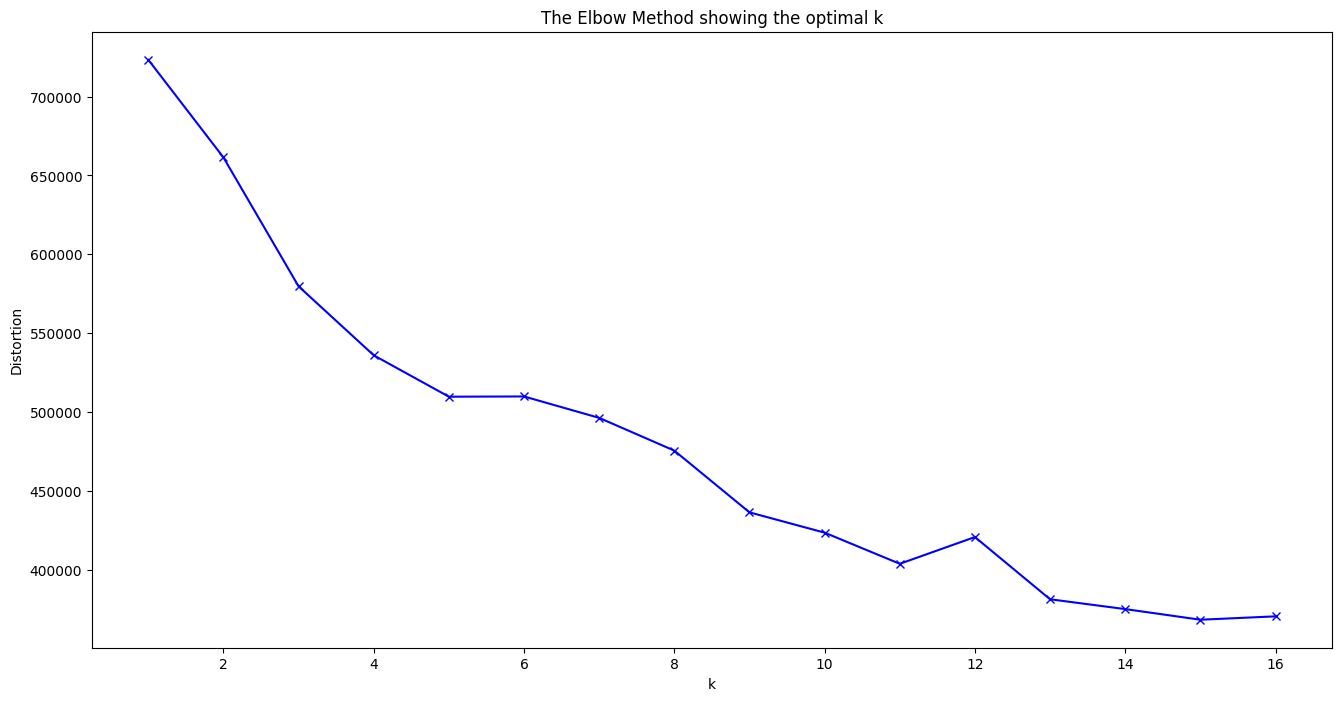

In [ ]:
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# ทดลองเลือก clusters = 2,3,4,5

from sklearn.cluster import KMeans
# again we know that it has 16 classes
for k in range(1,16) :
  model = KMeans(n_clusters=k)
  model.fit(X)
  y_pred = model.predict(X)
  print("When choose n_clusters = {}".format(k))
  print('ARI normalized case cluster:', metrics.adjusted_rand_score(y, y_pred))

When choose n_clusters = 1
ARI normalized case cluster: 0.0
When choose n_clusters = 2
ARI normalized case cluster: 0.018030673711825623
When choose n_clusters = 3
ARI normalized case cluster: 0.036174173486495396
When choose n_clusters = 4
ARI normalized case cluster: 0.045932538264585265
When choose n_clusters = 5
ARI normalized case cluster: 0.04922206839444986
When choose n_clusters = 6
ARI normalized case cluster: 0.04588265714123637
When choose n_clusters = 7
ARI normalized case cluster: 0.04497241430402956
When choose n_clusters = 8
ARI normalized case cluster: 0.040934741353862346
When choose n_clusters = 9
ARI normalized case cluster: 0.034170746207045494
When choose n_clusters = 10
ARI normalized case cluster: 0.0341377323319193
When choose n_clusters = 11
ARI normalized case cluster: 0.02886436195920417
When choose n_clusters = 12
ARI normalized case cluster: 0.02314143973729171
When choose n_clusters = 13
ARI normalized case cluster: 0.06395442022137462
When choose n_cluste

In [ ]:
# จะเห็นได้ว่า n_clsters = 5 จะทำให้ค่าAPIสูงสุด

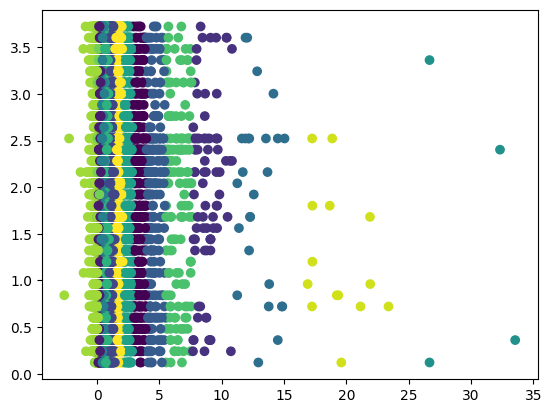

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(_X[:,5],_X[:,9],c=y_pred)
plt.show()